Pequena (e simples) demonstração de tratamento de dados e deanálise exploratória 

In [26]:
# Importando bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn

In [2]:
# Defino o caminho até o arquivo de dados que será analisado
#  A base de dados demonstram o pib e valores empenho de municípios do Sul do país
caminho_arq = "dados.csv"

# Crio dataframe utilizando padnas
base = pd.read_csv(caminho_arq, sep=";")

In [3]:
# Visualização simplificada do formato do dataframe
base

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [5]:
# Verificação se há algum valor nulo na base
base.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

Análise exploratória

Text(0.5, 1.0, 'PIB')

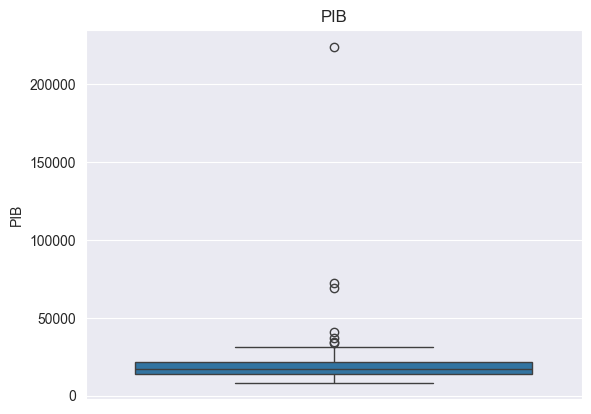

In [13]:
# Feito boxplot (PIB e Valor empenho) com intuito de observar como os valores se distribuiram
# Verificando de forma imeidata a mediana e a presença de outliers
srn.boxplot(data=base.PIB, orient='v').set_title('PIB')

Text(0.5, 1.0, 'VALOR EMPENHO')

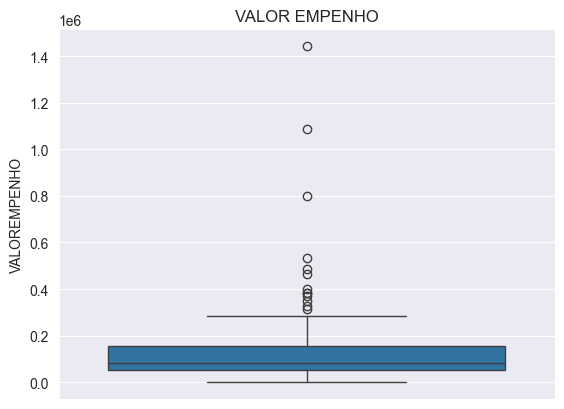

In [14]:
srn.boxplot(data=base.VALOREMPENHO, orient='v').set_title('VALOR EMPENHO')

[Text(0.5, 1.0, 'PIB')]

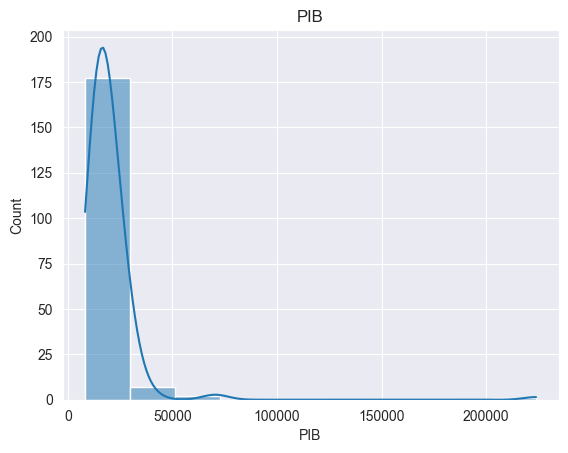

In [15]:
# A visualização em boxplot não se faz suficiente!
# Utilizando também o seaborn crio um histograma do PIB e do Valor empenho, destacando as respectivas linhas de densidade
srn.histplot(base.PIB, kde=True, bins=10).set(title='PIB')

[Text(0.5, 1.0, 'Valor Empenho')]

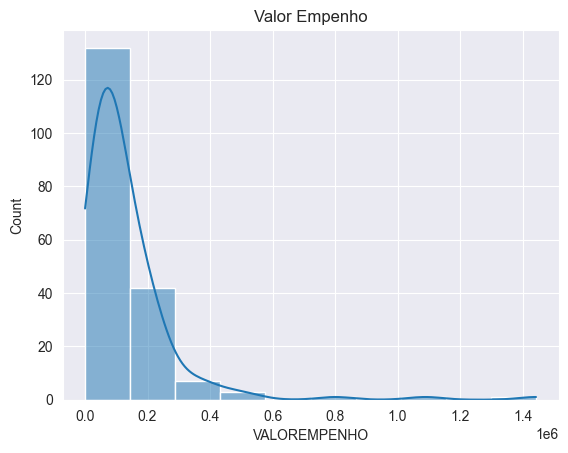

In [16]:
srn.histplot(base.VALOREMPENHO, kde=True, bins=10).set(title='Valor Empenho')

In [25]:
# Utilizando sort_values busco (como padrão) os valores crescentes da coluna PIB. Para melhor visualização e busca, destaquei apenas 10 municípios
menores_PIB = base.sort_values('PIB').head(10)

In [20]:
menores_PIB

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
88,216,REDENTORA,8236.63,60134.00
11,248,AMARAL FERRADOR,9216.87,235327.02
15,38,ENCRUZILHADA DO SUL,10372.80,200738.61
66,414,SENTINELA DO SUL,10477.52,92380.20
89,413,SAO VALERIO DO SUL,10503.72,67638.25
6,95,PIRATINI,10811.67,315884.50
56,204,MATA,10935.82,107740.90
37,222,SANTANA DA BOA VISTA,11172.34,139594.29
16,23,CANGUCU,11213.34,205741.65
47,288,JAQUIRANA,11413.37,129434.42


[Text(0.5, 1.0, 'Municípios de menor PIB')]

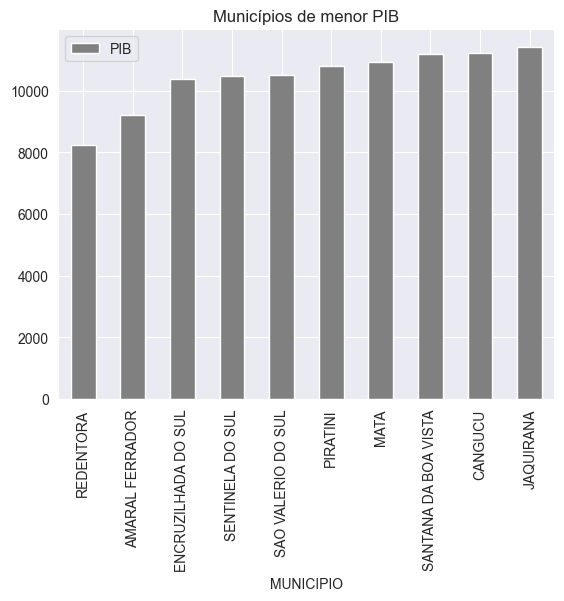

In [33]:
# Ciração de um simples gráfico de barra para melhor compreensão dos valores de PIB nos municípios destacados
menores_PIB.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray').set(title='Municípios de menor PIB')

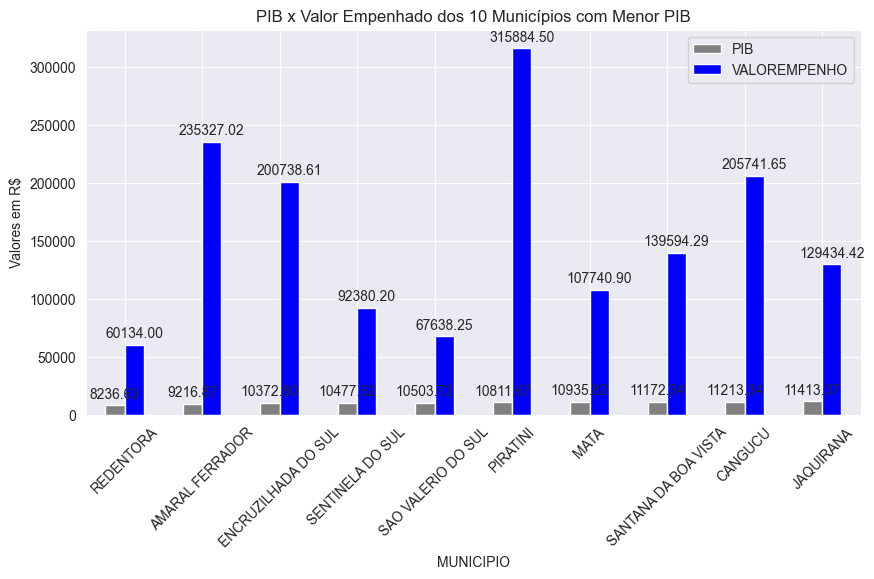

In [30]:
# Destaco a relação do PIB e do valor empenho dos municípios de menor PIB. 
# Crio o gráfico através do pandas
relacao_PIB_Empenho = menores_PIB.plot.bar(x='MUNICIPIO', y=['PIB', 'VALOREMPENHO'], color=['gray', 'blue'], figsize=(10, 5))

# Para melhor visualização, adciono rótulos de valores sobre as barras
for container in relacao_PIB_Empenho.containers:
    relacao_PIB_Empenho.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Melhorando a visualização utilizando matplotlib
# Rotaciona os nomes dos municípios para não sobrepor
plt.xticks(rotation=45)  
# Nome do eixo y
plt.ylabel("Valores em R$")
# Nome do título
plt.title("PIB x Valor Empenhado dos 10 Municípios com Menor PIB")

plt.show()

Text(0.5, 1.0, 'Municípios com maior PIB')

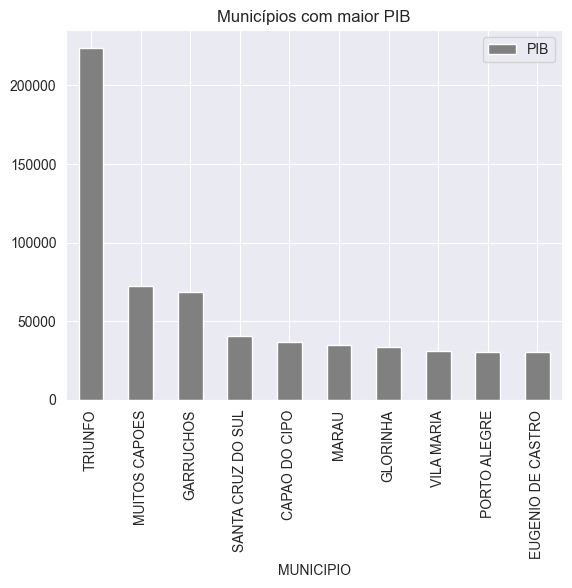

In [34]:
# Agora repito os mesmos procedimentos para os municípios com maior PIB
# Utilizo ascending como Falso para pegar os valores decrescente
maiores_PIB = base.sort_values('PIB', ascending=False).head(10)
maiores_PIB.plot.bar(x='MUNICIPIO',y='PIB', color = 'gray').set_title('Municípios com maior PIB')

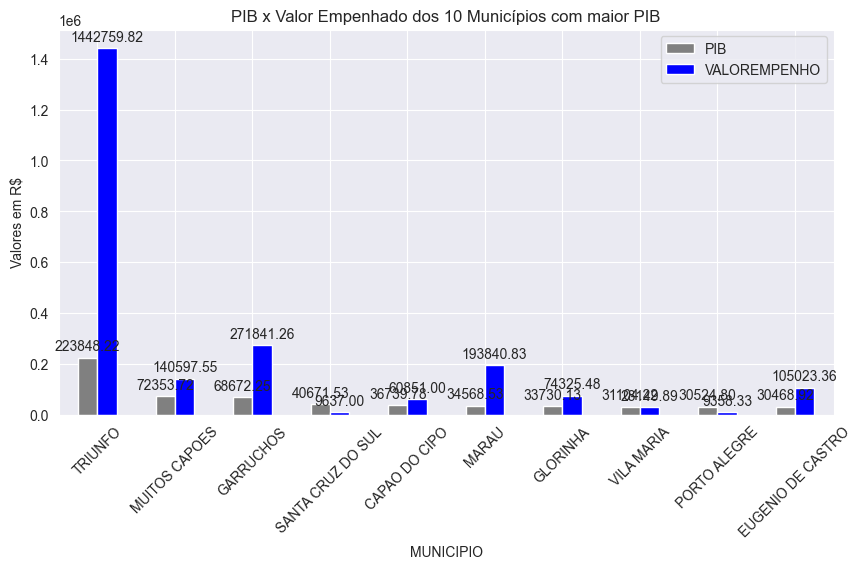

In [36]:
# Destaco a relação do PIB e do valor empenho dos municípios de maior PIB. 
# Crio o gráfico através do pandas
relacao_maior_PIB_Empenho = maiores_PIB.plot.bar(x='MUNICIPIO', y=['PIB', 'VALOREMPENHO'], color=['gray', 'blue'], figsize=(10, 5))

# Para melhor visualização, adciono rótulos de valores sobre as barras
for container in relacao_maior_PIB_Empenho.containers:
    relacao_maior_PIB_Empenho.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Melhorando a visualização utilizando matplotlib
# Rotaciona os nomes dos municípios para não sobrepor
plt.xticks(rotation=45)  
# Nome do eixo y
plt.ylabel("Valores em R$")
# Nome do título
plt.title("PIB x Valor Empenhado dos 10 Municípios com maior PIB")

plt.show()

Text(0.5, 1.0, 'Municípios de menor valor empenho')

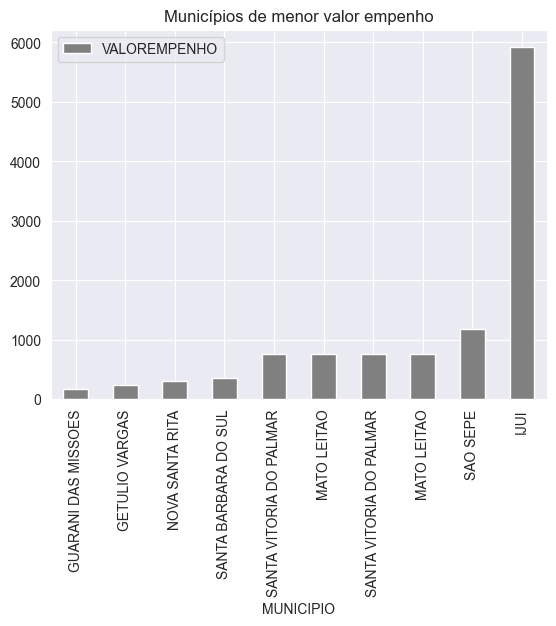

In [40]:
# Repito os mesmos procedimentos agogra considerando os valores empenho
menor_empenho = base.sort_values('VALOREMPENHO').head(10)
menor_empenho.plot.bar(x='MUNICIPIO',y='VALOREMPENHO', color = 'gray').set_title('Municípios de menor valor empenho')

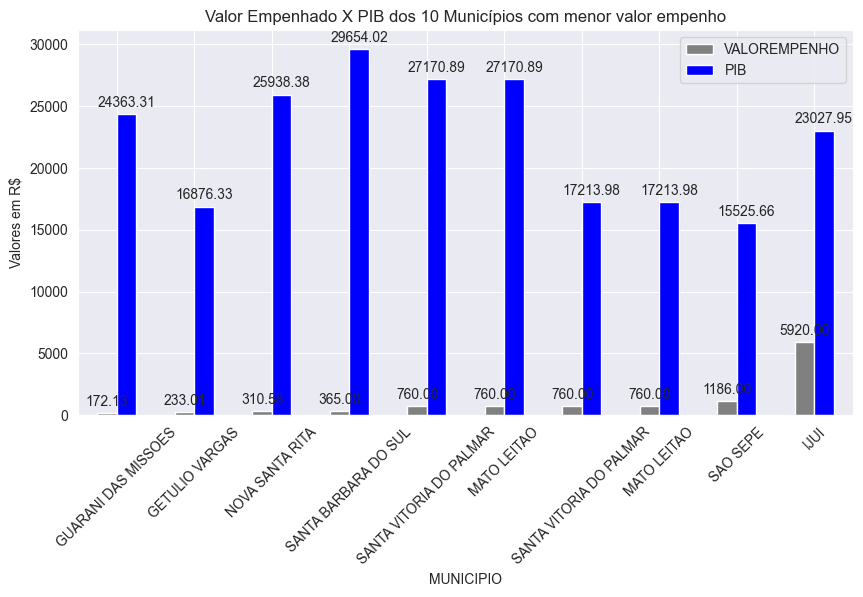

In [41]:
# Destaco a relação do valor empenho e PIB, dos municípios de menor valor empenho 
# Crio o gráfico através do pandas
relacao_Empenho_PIB = menor_empenho.plot.bar(x='MUNICIPIO', y=['VALOREMPENHO', 'PIB'], color=['gray', 'blue'], figsize=(10, 5))

# Para melhor visualização, adciono rótulos de valores sobre as barras
for container in relacao_Empenho_PIB.containers:
    relacao_Empenho_PIB.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Melhorando a visualização utilizando matplotlib
# Rotaciona os nomes dos municípios para não sobrepor
plt.xticks(rotation=45)  
# Nome do eixo y
plt.ylabel("Valores em R$")
# Nome do título
plt.title("Valor Empenhado X PIB dos 10 Municípios com menor valor empenho")

plt.show()

Text(0.5, 1.0, 'Municípios de maior valor empenho')

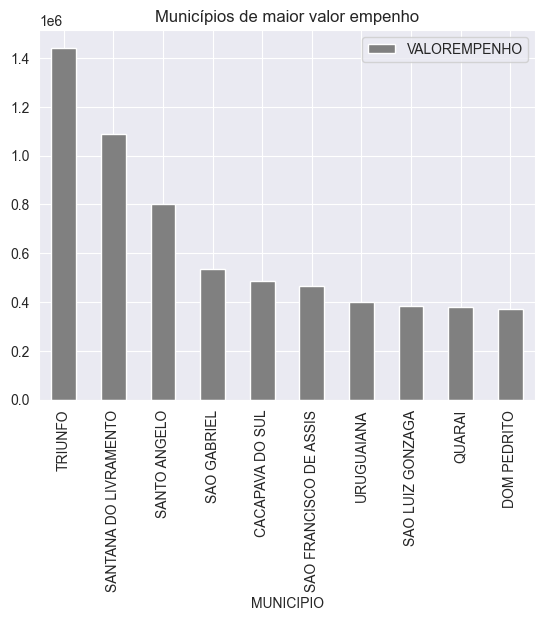

In [42]:
maior_empenho = base.sort_values('VALOREMPENHO', ascending=False).head(10)
maior_empenho.plot.bar(x='MUNICIPIO',y='VALOREMPENHO', color = 'gray').set_title('Municípios de maior valor empenho')

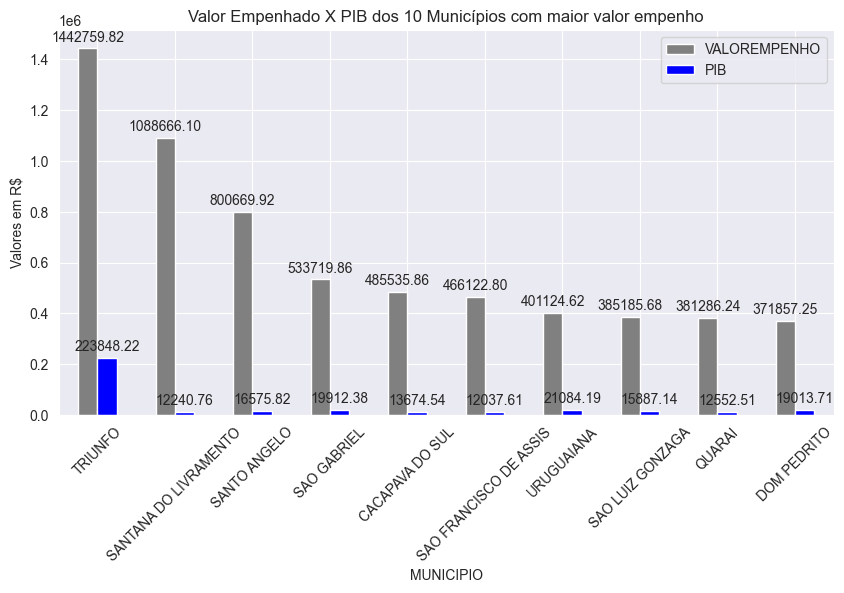

In [43]:
# Destaco a relação valor empenho e PIB, dos municípios de maior valor empenho 
# Crio o gráfico através do pandas
relacao_maior_Empenho_PIB = maior_empenho.plot.bar(x='MUNICIPIO', y=['VALOREMPENHO', 'PIB'], color=['gray', 'blue'], figsize=(10, 5))

# Para melhor visualização, adciono rótulos de valores sobre as barras
for container in relacao_maior_Empenho_PIB.containers:
    relacao_maior_Empenho_PIB.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Melhorando a visualização utilizando matplotlib
# Rotaciona os nomes dos municípios para não sobrepor
plt.xticks(rotation=45)  
# Nome do eixo y
plt.ylabel("Valores em R$")
# Nome do título
plt.title("Valor Empenhado X PIB dos 10 Municípios com maior valor empenho")

plt.show()